# 1. Import Necessary libraries

In [7]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [3]:
newspaper_data = pd.read_csv('NewspaperData.csv')
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


# 3. Data Understanding

## 3.1 Initial Analysis

In [4]:
newspaper_data.shape

(34, 3)

In [5]:
newspaper_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

## 3.2 Perform Assumption Check

## =======================================================================

# 1. Linearity Test

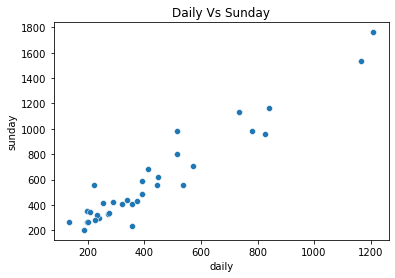

In [9]:
sns.scatterplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

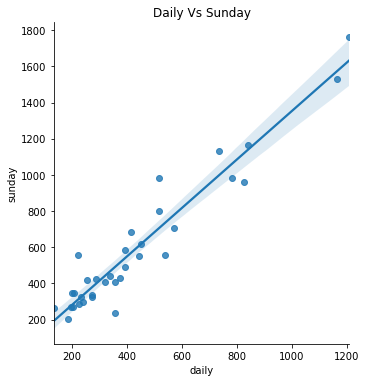

In [10]:
sns.lmplot(x='daily',y='sunday',data=newspaper_data)
plt.title('Daily Vs Sunday')
plt.show()

### Linearity Test is Failed

# 2. Normality Test

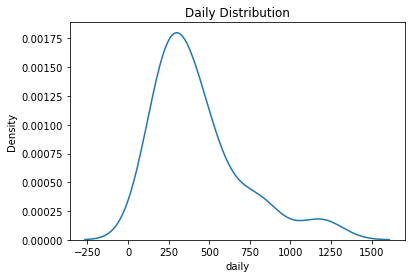

In [13]:
sns.distplot(a = newspaper_data['daily'],hist=False)
plt.title('Daily Distribution')
plt.show()

### Normality Test FAILED.

# 3. No Multicollinearity

Cannot be checked here.

# 4. No AutoRegression

Here we dont have input features with datetime datatype.

# 5. Homoscadasticity Check || 6. Zero Residual Mean

This can be performed only after **Model Training.**

## =======================================================================

# 4. Data Preparation

In [14]:
newspaper_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [15]:
del newspaper_data['Newspaper']

In [16]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [17]:
newspaper_data.dtypes

daily     float64
sunday    float64
dtype: object

In [18]:
newspaper_data.isna().sum()

daily     0
sunday    0
dtype: int64

# 5. Model Building || 6. Model Training

Linear Regression can be built by using any of the 2 libraries:

1. Statsmodels
2. sklearn

### Using Statsmodels

In [19]:
import statsmodels.formula.api as smf

In [23]:
linear_model = smf.ols(formula = 'sunday~daily', data = newspaper_data).fit()
linear_model

In [24]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

# 7. Model Testing

### Manual Prediction

In [28]:
# y = mx+c
# If x = 200, y = ??
(1.339715 * 200) + 13.835630

281.77862999999996

In [26]:
#If x = 300, y = ??
(1.339715 * 300) + 13.835630

415.75012999999996

In [27]:
#If x = 400, y = ??
(1.339715 * 400) + 13.835630

549.72163

### Automatic Prediction

In [29]:
newspaper_data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [31]:
X_test = pd.DataFrame(data={'daily':[200,300,400]})
X_test

,daily
0,200
1,300
2,400


In [32]:
linear_model.predict(X_test)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

# 8. Model Evaluation

### ---------------PARK---------

# 9. Model Deployement

In [33]:
from pickle import dump

In [34]:
dump(linear_model,open('intelligence.pkl','wb'))

In [35]:
from pickle import load

In [37]:
loaded_intelligence_file = load(open('intelligence.pkl','rb'))

In [38]:
loaded_intelligence_file.predict(X_test)

0    281.778581
1    415.750057
2    549.721533
dtype: float64

# THE END!!!